# Song Recommendation System: Cohort of Songs

## Problem Scenario
The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information. 

Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs. 

## Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<span style="color: red; font-size: 30px">Change **viewPlots** below if you want to run plots!!</span>

In [2]:
viewPlots = True

In [3]:
pd.set_option("display.max_columns", None)

## Data Overview

In [4]:
spotify_df = pd.read_csv("../data/rolling_stones_spotify.csv", index_col=0)
spotify_df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  
dtype

In [6]:
spotify_df.isna().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [7]:
spotify_df[["name", "album", "release_date", "id", "uri"]].nunique()

name             954
album             90
release_date      57
id              1610
uri             1610
dtype: int64

In [8]:
spotify_df[spotify_df.duplicated() == True]

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms


In [9]:
spotify_df.describe

<bound method NDFrame.describe of                              name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoR

### Sample Data

In [10]:
spotify_df.sample(20)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
462,Gimme Shelter - Live,Havana Moon (Live),2016-11-11,13,4FlItJzB5XHT6mSEzJeaG0,spotify:track:4FlItJzB5XHT6mSEzJeaG0,0.045300,0.457,0.872,0.033500,0.6780,-4.210,0.0339,114.645,0.241,30,484999
733,Sweethearts Together - Remastered,Voodoo Lounge (Remastered 2009),1994-07-11,10,54EMrgM3V16raw6r1mAQbC,spotify:track:54EMrgM3V16raw6r1mAQbC,0.064300,0.667,0.574,0.000025,0.1530,-7.793,0.0271,127.325,0.632,30,285640
348,Route 66 - Live,From The Vault: No Security - San Jose 1999 (L...,2018-07-13,13,6asoECG1bujhCBItWqjYUR,spotify:track:6asoECG1bujhCBItWqjYUR,0.370000,0.416,0.977,0.073900,0.9050,-5.239,0.2190,144.845,0.387,19,193573
97,Neighbours - Remastered 2021,Tattoo You,2021-10-22,6,39f71Z1Ge24QPCmCSFfUMx,spotify:track:39f71Z1Ge24QPCmCSFfUMx,0.075400,0.479,0.981,0.005630,0.2450,-1.712,0.0710,82.412,0.671,8,214306
1537,"Surprise, Surprise","The Rolling Stones, Now!",1965-02-13,12,13SUnVbXf66LB2F99DB0Gu,spotify:track:13SUnVbXf66LB2F99DB0Gu,0.021100,0.741,0.872,0.000029,0.0789,-8.898,0.0711,107.706,0.923,24,151746
604,Happy - Live,Some Girls: Live In Texas '78,2011-11-21,14,0RoQbvPKZOZrAbHfvUubf0,spotify:track:0RoQbvPKZOZrAbHfvUubf0,0.006860,0.171,0.989,0.000475,0.9040,-4.568,0.1640,157.806,0.382,18,192746
229,Start Me Up - Live,Bridges To Bremen (Live),2019-06-21,19,0XCEjoymU5mjVU4J2TlDnP,spotify:track:0XCEjoymU5mjVU4J2TlDnP,0.241000,0.419,0.945,0.047600,0.9700,-3.609,0.0741,119.245,0.564,16,287386
1003,Time Waits For No One - Remastered,It's Only Rock 'N' Roll (2009 Re-Mastered),1974-10-18,5,3ZQimDj4LetbHs2ry5jAQr,spotify:track:3ZQimDj4LetbHs2ry5jAQr,0.078400,0.533,0.781,0.000273,0.0630,-4.602,0.0316,118.316,0.815,34,398106
221,Thief In The Night - Live,Bridges To Bremen (Live),2019-06-21,11,5gp86m1BSjXePFNrMFWUv9,spotify:track:5gp86m1BSjXePFNrMFWUv9,0.285000,0.358,0.798,0.000000,0.9140,-5.706,0.0530,95.254,0.472,12,404866
1017,Short And Curlies,It's Only Rock 'N' Roll,1974-10-18,9,3eozqbjQ3b8ThqmjQFxGZ2,spotify:track:3eozqbjQ3b8ThqmjQFxGZ2,0.368000,0.475,0.550,0.624000,0.3680,-10.302,0.0338,119.165,0.886,20,163666


### Observations
- a lot of the describe data at first glance looks to have a Gaussian shape. 
- Instrumentalist looks to be the main exception with what seems to be left-skewed data. This suggests a lot of instrumental or instrumental like songs.
- No missing data
- No duplicates
- At first glance, no invalid values
- Treat track number as an identifier in this case, not as quantitative data

## EDA
Key Goals:
- Identify 2 most popular albums
- Identify any patterns
- Identify correlation with popularity
- Cluster data
- Identify features whose coefficients are just noise for dimensionality reduction
- Identify cluster differences by labeling

### Data Visualization
Goal: Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album 

In [11]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  
dtype

In [12]:
to_hist_plot = [
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence",
    "popularity",
    "duration_ms"
]

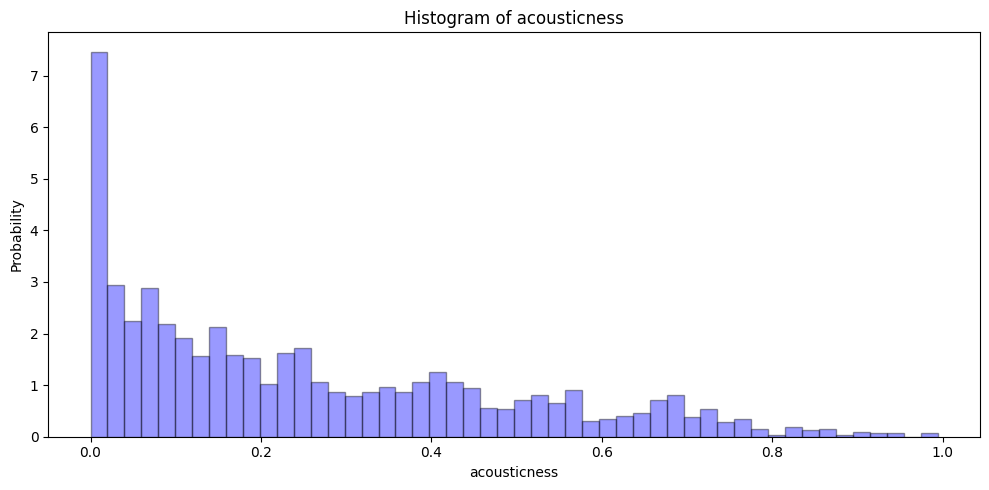

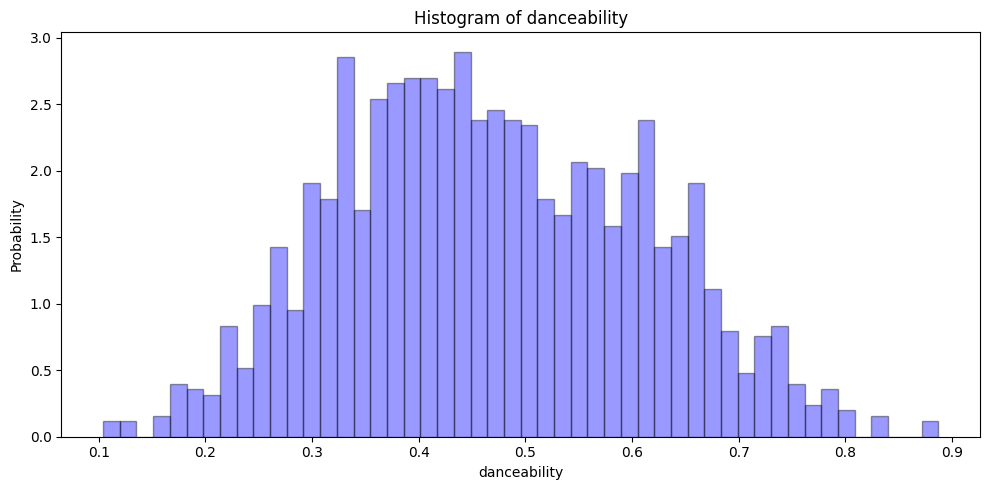

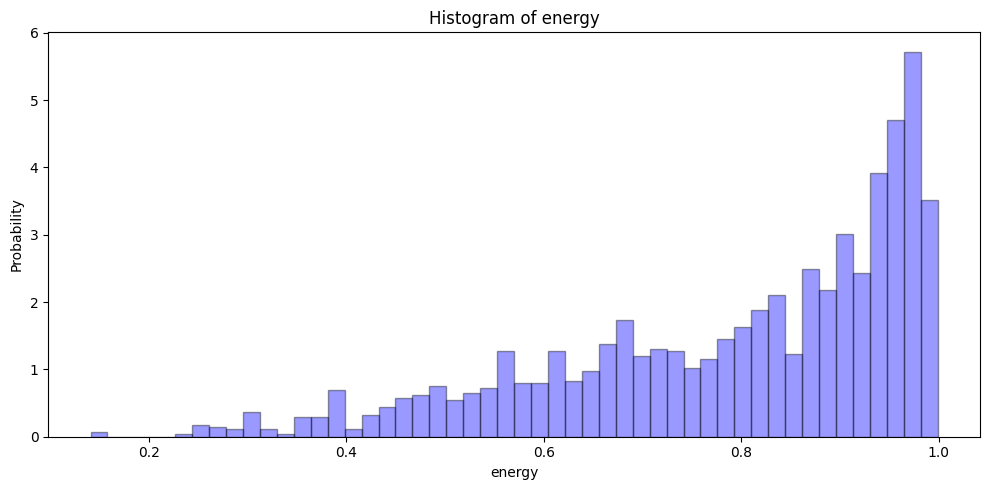

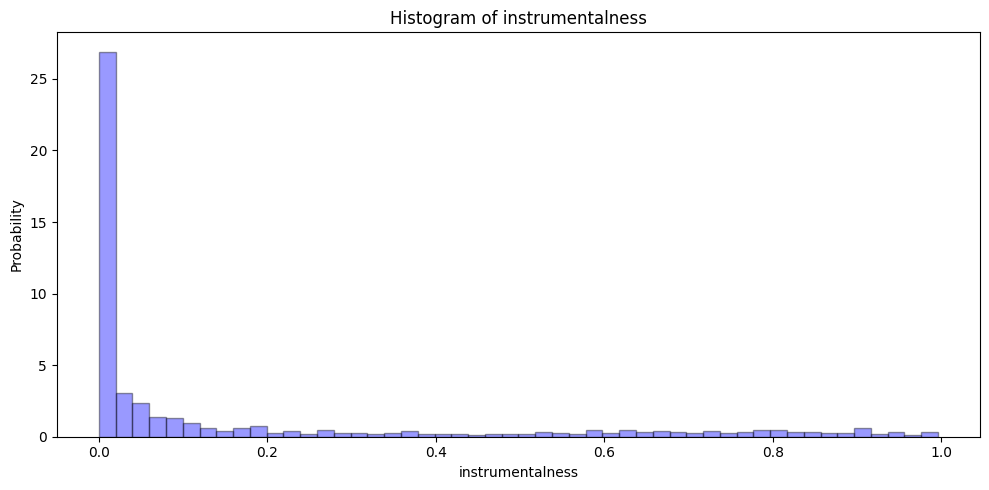

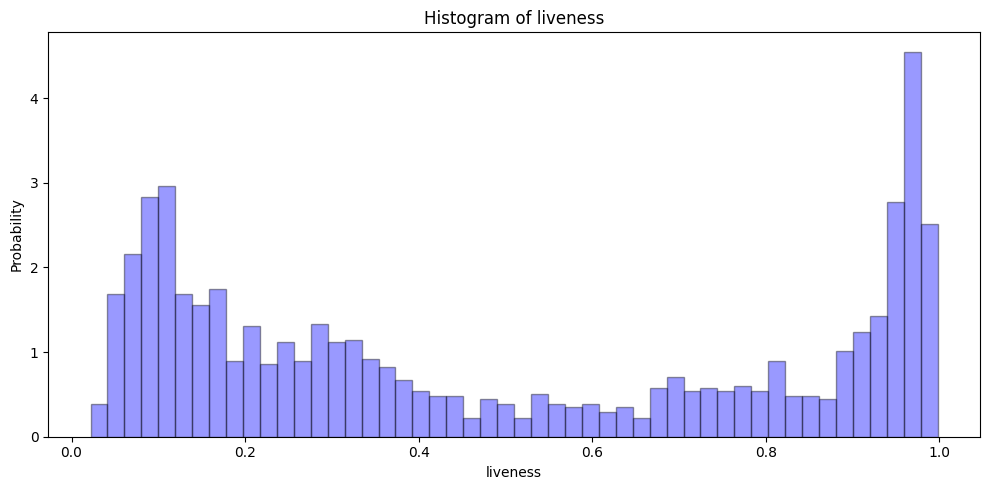

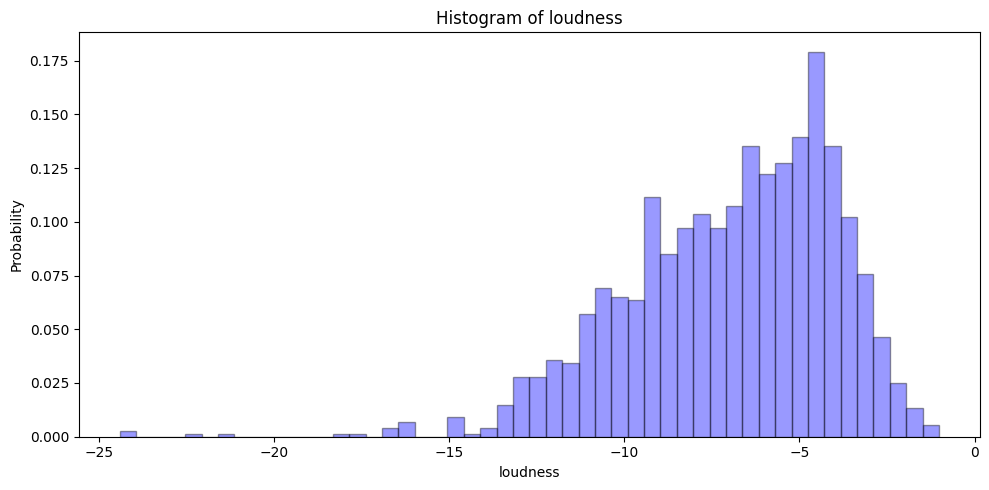

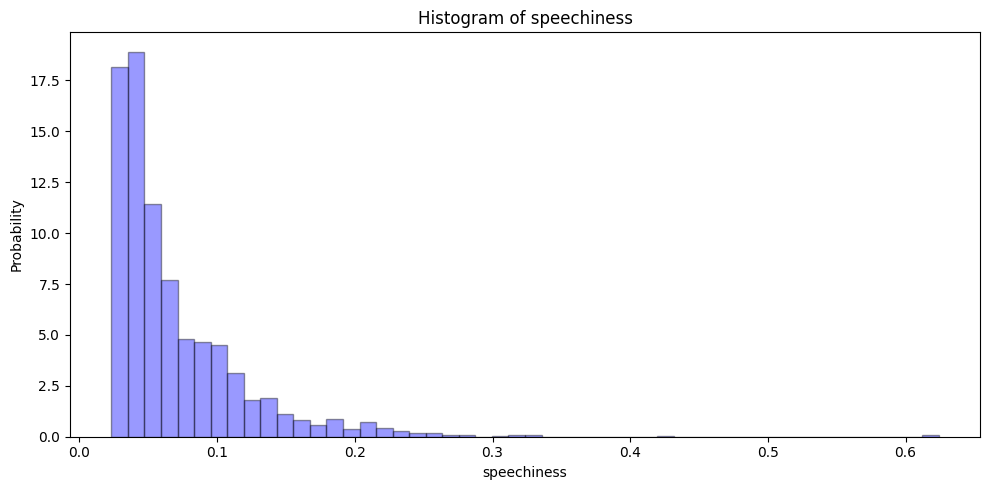

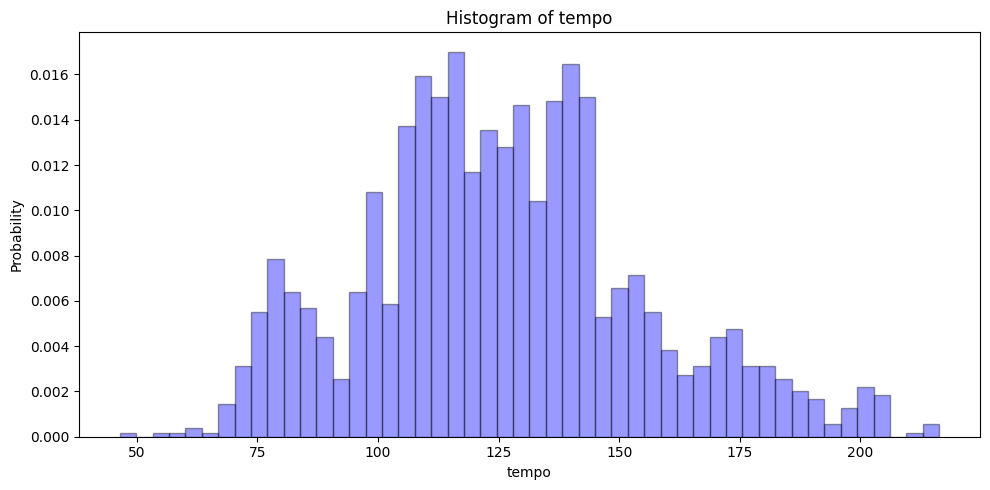

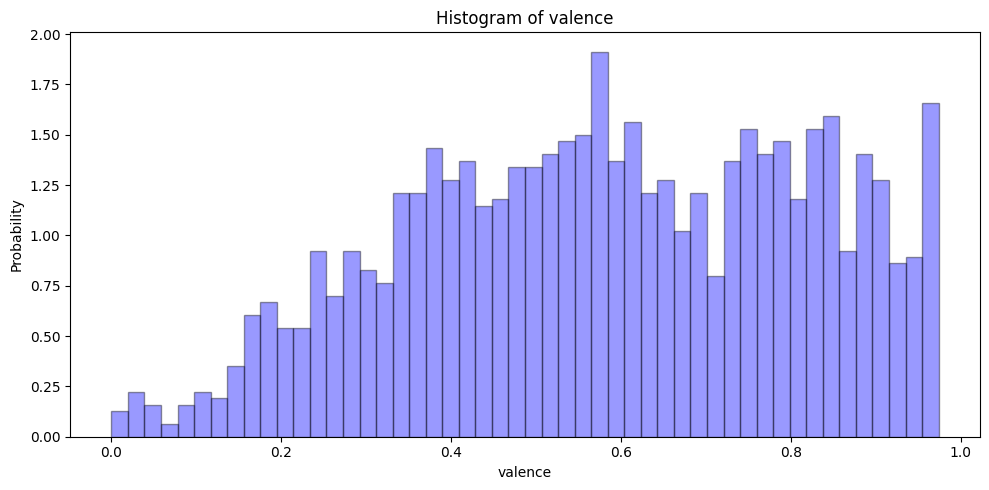

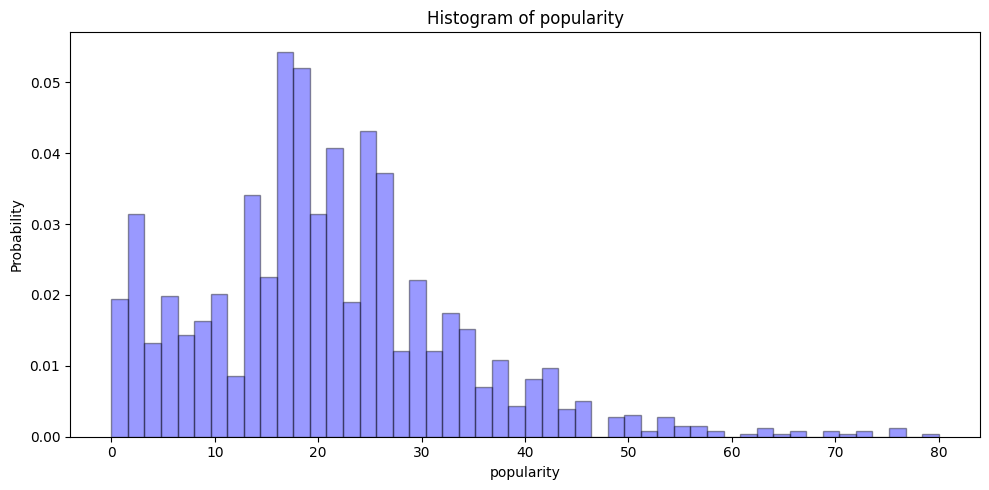

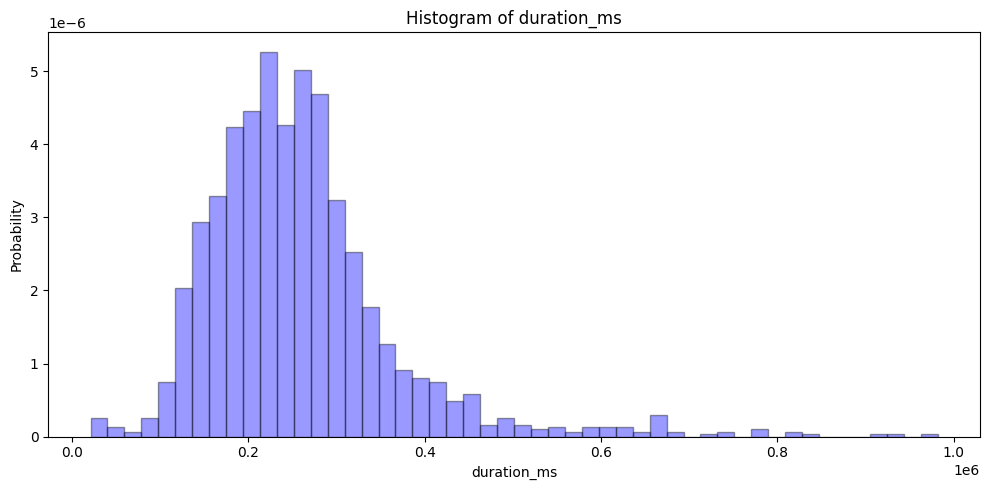

In [13]:
if viewPlots:
    for feature in to_hist_plot:
        fig, axes = plt.subplots(1, 1, figsize=(10, 5))

        axes.hist(x=spotify_df[feature], bins=50, color="blue", edgecolor="black", alpha=0.4, density=True)
        axes.set_title(f"Histogram of {feature}")
        axes.set_xlabel(f"{feature}")
        axes.set_ylabel(f"Probability")

        plt.tight_layout()
        plt.show()

### Top-Two Albums

In [14]:
#Find the two most popular albums by collective popular songs
grouped_albums_by_popularity = (
    spotify_df
    .groupby(by="album")
    .sum("popularity")
    .sort_values(by="popularity", ascending=False)
)
grouped_albums_by_popularity.head()


,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
album,,,,,,,,,,,,
Honk (Deluxe),1128,9.671574,25.707,38.661,6.725271,14.8288,-236.324,2.2572,5715.625,31.3290,1232,12059243
Tattoo You (Super Deluxe),462,11.012900,20.050,41.727,16.109790,28.9255,-221.739,4.1007,5677.156,26.6816,1008,12467581
Goats Head Soup (Deluxe),253,6.662140,15.797,30.950,9.265615,14.7189,-194.461,2.0204,4583.429,23.7040,891,10391014
Some Girls (Deluxe Version),266,13.816200,25.106,37.386,8.512990,10.8536,-179.108,2.9588,5271.614,30.1080,852,9869078
Exile On Main Street (Deluxe Version),226,11.502060,12.521,22.658,10.443289,9.0773,-149.671,1.1619,3448.722,20.1430,839,6493641


Albums Honk (Deluxe) and Tattoo You (Super Deluxe) are the 2 most popular albums based on the sum total of popularity for their songs respectively. This is a good indicator of any user enjoying the recommendation of these 2 albums.

### Popularity Correlation

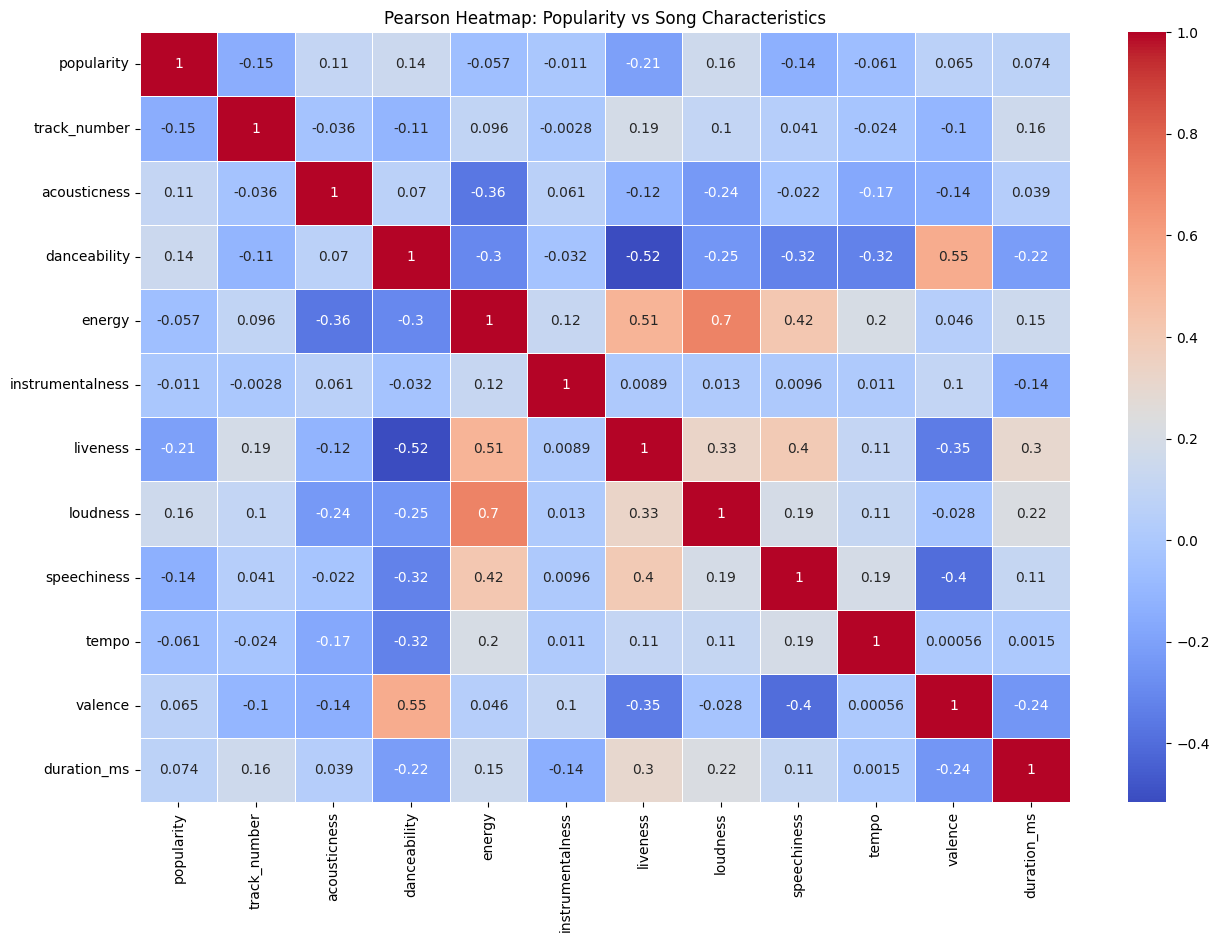

In [15]:
if viewPlots:
    #Investigate popularity vs other features, using pearson correlation
    numerical_features = (
        spotify_df
        .select_dtypes(include=["float64", "int64"])
        .columns
        .drop("popularity")
    )
    pearson_corr = spotify_df[["popularity", *numerical_features]].corr(method="pearson")

    plt.figure(figsize=(15, 10))
    sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Pearson Heatmap: Popularity vs Song Characteristics")
    plt.show()

Looks like popularity has a relatively higher linear relationship with:
- track_number (negative)
- acousticness
- danceability
- liveness (negative)
- loudness
- speechiness (negative)

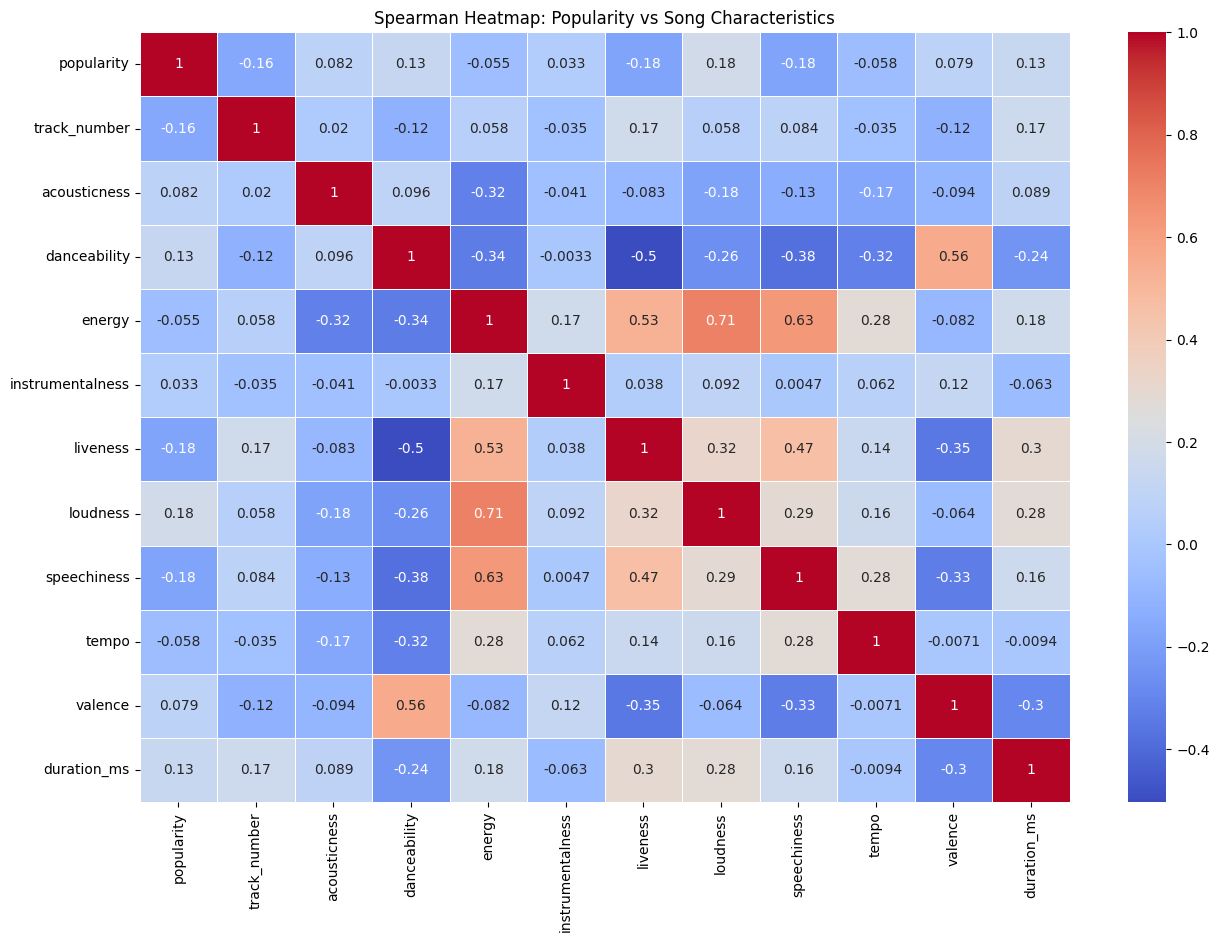

In [16]:
if viewPlots:
    #Investigate popularity vs other features, using spearman correlation
    numerical_features = (
        spotify_df
        .select_dtypes(include=["float64", "int64"])
        .columns
        .drop("popularity")
    )
    spearman_corr = spotify_df[["popularity", *numerical_features]].corr(method="spearman")

    plt.figure(figsize=(15, 10))
    sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Spearman Heatmap: Popularity vs Song Characteristics")
    plt.show()

Looks like popularity has a relatively higher monotonic relationship with:
- track_number (negative)
- danceability
- liveness (negative)
- loudness
- speechiness (negative)
- duration_ms

### Release Date vs Popularity

In [17]:
#Create a sorted release date of all songs in the population
release_date_sorted = spotify_df.iloc[spotify_df["release_date"].sort_values().index].copy(deep=True)
release_date_sorted

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1609,Walking The Dog,The Rolling Stones,1964-04-16,12,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,0.3830,0.727,0.934,0.068500,0.0965,-8.373,0.0359,125.275,0.9690,35,189186
1598,Route 66,The Rolling Stones,1964-04-16,1,1FRP8d6l2jm3DS5f78ZrhK,spotify:track:1FRP8d6l2jm3DS5f78ZrhK,0.2960,0.671,0.725,0.000220,0.0889,-10.065,0.0650,85.270,0.9560,51,140400
1599,I Just Want To Make Love To You - Mono Version,The Rolling Stones,1964-04-16,2,7j96wehhMtN0fkVvFhD8Ix,spotify:track:7j96wehhMtN0fkVvFhD8Ix,0.2190,0.657,0.825,0.845000,0.3540,-8.940,0.0980,126.817,0.5820,34,137666
1600,Honest I Do,The Rolling Stones,1964-04-16,3,22Bvku5X3odiXj2wbtgY4T,spotify:track:22Bvku5X3odiXj2wbtgY4T,0.1510,0.646,0.374,0.651000,0.2080,-10.706,0.1030,87.593,0.4750,31,129800
1601,Mona (I Need You Baby),The Rolling Stones,1964-04-16,4,1o2wswWx1RkkNuVp6Z21HC,spotify:track:1o2wswWx1RkkNuVp6Z21HC,0.0688,0.695,0.684,0.000257,0.0981,-9.968,0.1330,99.014,0.4270,33,214693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,Brown Sugar - Live,Licked Live In NYC,2022-06-10,21,2JMQKVRanp4auj0hGkw3GE,spotify:track:2JMQKVRanp4auj0hGkw3GE,0.4390,0.340,0.989,0.722000,0.9820,-4.734,0.1080,139.361,0.1640,25,337600
21,Sympathy For The Devil - Live,Licked Live In NYC,2022-06-10,22,183DVZGxd5Nw5ia0Tv8KOF,spotify:track:183DVZGxd5Nw5ia0Tv8KOF,0.4240,0.447,0.979,0.000022,0.9530,-4.942,0.1140,109.191,0.2950,26,409466
22,Jumpin Jack Flash - Live,Licked Live In NYC,2022-06-10,23,7p0sTErcMXc1jJ2Ff4QlcT,spotify:track:7p0sTErcMXc1jJ2Ff4QlcT,0.3130,0.192,0.964,0.538000,0.9680,-4.264,0.0609,138.005,0.1910,25,370733
11,Thru And Thru - Live,Licked Live In NYC,2022-06-10,12,1rXa5covpujMsZPzOadZRr,spotify:track:1rXa5covpujMsZPzOadZRr,0.6720,0.278,0.651,0.000425,0.8930,-7.024,0.0553,95.853,0.3340,27,432360


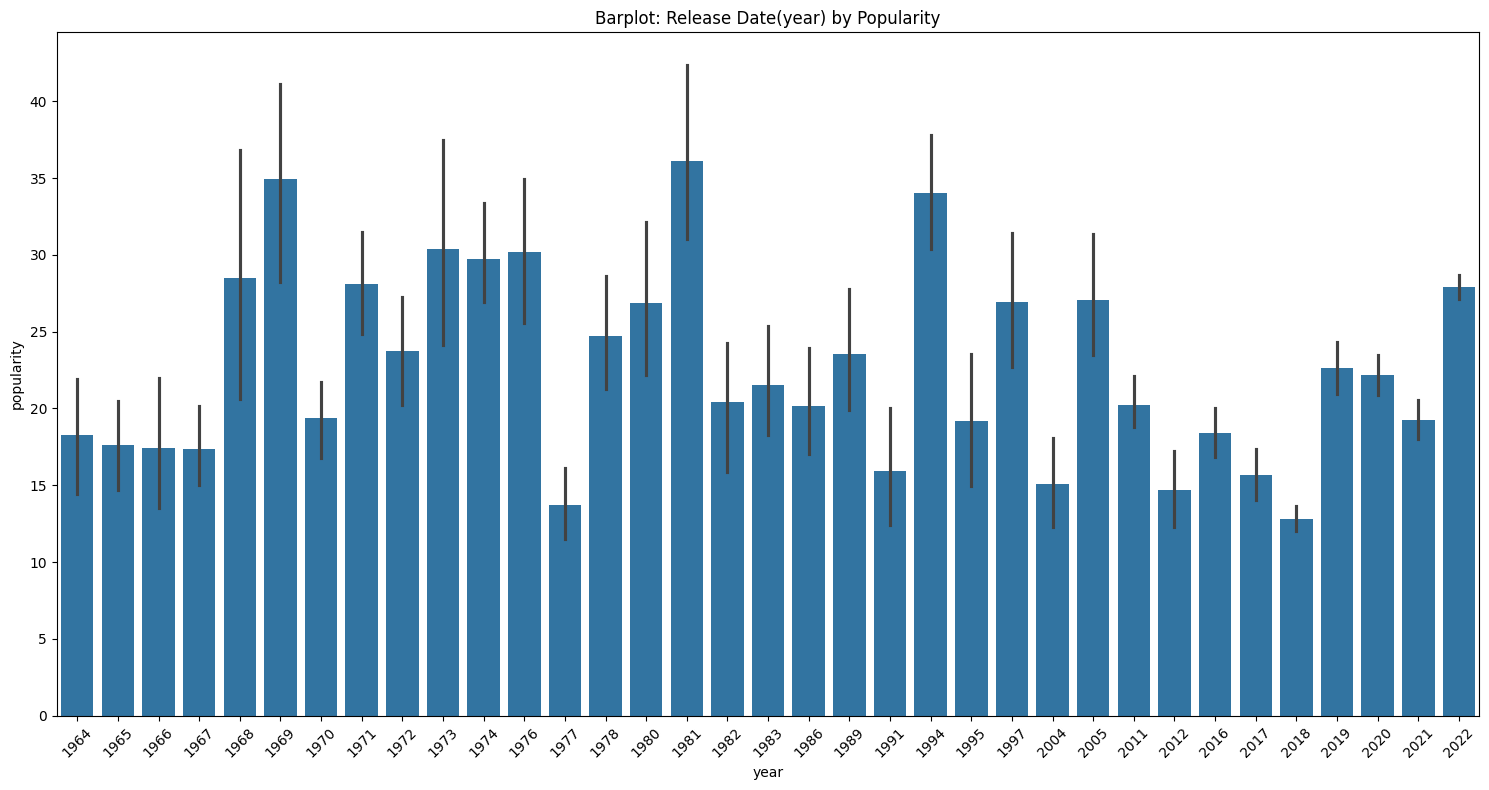

In [18]:
if viewPlots:
    #Visualize if there's a correlation between popularity and time!
    release_date_sorted["year"] = (pd.to_datetime(release_date_sorted["release_date"]).dt.year)
    heatmap_per_year = (
        release_date_sorted
        .groupby("year")["popularity"]
        .mean()
    )
    plt.figure(figsize=(15, 8))
    plt.title("Barplot: Release Date(year) by Popularity")
    sns.barplot(data=release_date_sorted, x="year", y="popularity")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

We now have a visual of the most popular times for our population being in the years 1969, 1981, and 1994 with 1981 being the highest.

In [19]:
#Check what years the two most popular albums came out
release_date_sorted[release_date_sorted["album"].isin(["Honk (Deluxe)","Tattoo You (Super Deluxe)"])]

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
245,Rain Fall Down,Honk (Deluxe),2019-04-19,13,2rtNvbGFyPcthRNxXw7wEO,spotify:track:2rtNvbGFyPcthRNxXw7wEO,0.00188,0.657,0.844,0.00548,0.0638,-6.597,0.0559,98.016,0.528,28,294293,2019
252,Just Your Fool,Honk (Deluxe),2019-04-19,20,4PEamNI5gvkWl9ITQi86x1,spotify:track:4PEamNI5gvkWl9ITQi86x1,0.30300,0.533,0.898,0.32700,0.2330,-4.465,0.0586,116.193,0.818,22,138386,2019
251,Waiting On A Friend,Honk (Deluxe),2019-04-19,19,0J569qfRzrvr6cxM716sSm,spotify:track:0J569qfRzrvr6cxM716sSm,0.15800,0.605,0.776,0.01910,0.3300,-6.275,0.0282,116.920,0.904,27,275466,2019
250,Emotional Rescue,Honk (Deluxe),2019-04-19,18,5At4b16uKSp3l3fJUgdee3,spotify:track:5At4b16uKSp3l3fJUgdee3,0.12100,0.679,0.627,0.07040,0.0379,-5.297,0.0594,113.393,0.785,28,340480,2019
249,It's Only Rock'n'Roll (But I Like It),Honk (Deluxe),2019-04-19,17,45aycSILYZTT5fc7u6nOQx,spotify:track:45aycSILYZTT5fc7u6nOQx,0.43100,0.617,0.960,0.00109,0.1380,-3.971,0.0518,128.396,0.786,28,308173,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Tumbling Dice - Live at Wembley Stadium 1982,Tattoo You (Super Deluxe),2021-10-22,18,4FuwLhBiHFOinjkXyi1GN7,spotify:track:4FuwLhBiHFOinjkXyi1GN7,0.54100,0.446,0.915,0.29600,0.9660,-6.404,0.0975,117.936,0.526,17,267066,2021
84,She's So Cold - Live at Wembley Stadium 1982,Tattoo You (Super Deluxe),2021-10-22,19,3HylUWQsFpoYy8hUGPQeYa,spotify:track:3HylUWQsFpoYy8hUGPQeYa,0.21900,0.360,0.952,0.67300,0.7360,-6.579,0.1380,168.863,0.618,18,250493,2021
85,Hang Fire - Live at Wembley Stadium 1982,Tattoo You (Super Deluxe),2021-10-22,20,5OOPWKx9NoFQDLOPjfWKzE,spotify:track:5OOPWKx9NoFQDLOPjfWKzE,0.22800,0.197,0.979,0.71200,0.9930,-5.800,0.0954,171.766,0.570,17,147106,2021
86,Miss You - Live at Wembley Stadium 1982,Tattoo You (Super Deluxe),2021-10-22,21,3dAaW8lo0SEpUMdrfmn0Rd,spotify:track:3dAaW8lo0SEpUMdrfmn0Rd,0.25500,0.509,0.874,0.10400,0.9110,-6.823,0.0498,116.717,0.683,19,468586,2021


Interesting to see the 2 most popular albums are in the years 2019 and 2021. Although take notice, they are "deluxe" and "super deluxe" versions, meaning they are re-releases. Honk is a compilation album featuring a lot of their top songs since 1971. Tattoo You is a celebratory album of the 1981 predecessor(highest popularity) with unheard of bonus track "Lost and Found" and a live album from Wembley 1982, and more. This gives a better explanation on why the popularity albums are now and not when they first came out like our graph showed, they are using the best years of their musical catalog. 

### Song Features vs Popularity

In [20]:
#Create grouped popularity dataframe and compare correlating features from our correlation heatmaps
correlating_features = [
    "track_number",     #negative
    "acousticness",     #Derived from pearson
    "danceability",
    "liveness",     #negative
    "loudness",
    "speechiness",      #negative
    "duration_ms"   #Derived from spearman
]

grouped_popularity_avgs = (
        release_date_sorted
        .groupby("popularity")[correlating_features]
        .agg(["mean","median"])
    )

#View the top 5 and bottom 5 popular groups
grouped_popularity_avgs

track_number        acousticness         danceability         \
                   mean median         mean  median         mean median   
popularity                                                                
0              8.882353    7.0     0.186144  0.0508     0.525000  0.497   
1              6.969697    7.0     0.247344  0.1920     0.506212  0.551   
2              6.522727    7.0     0.179499  0.1305     0.542432  0.586   
3              7.486486    8.0     0.168079  0.0723     0.497811  0.502   
4              8.147059    8.5     0.289611  0.1995     0.471882  0.478   
...                 ...    ...          ...     ...          ...    ...   
71             5.000000    5.0     0.670000  0.6700     0.429000  0.429   
72             9.000000    9.0     0.390000  0.3900     0.783000  0.783   
73             1.000000    1.0     0.518000  0.5180     0.702000  0.702   
76             3.000000    1.0     0.176300  0.0436     0.662667  0.634   
80             1.000000    1.0     0.049300  0.0493     0.464000  0.464   

            liveness          loudness        speechiness           \
                mean  median      mean median        mean   median   
popularity                                                           
0           0.412876  0.2380 -9.528824 -8.357    0.065165  0.05540   
1           0.344815  0.2460 -9.073394 -9.049    0.062888  0.04770   
2           0.290011  0.1895 -9.500773 -9.108    0.050905  0.03795   
3           0.318797  0.1640 -8.949297 -9.651    0.058627  0.04570   
4           0.431856  0.3305 -8.334941 -8.603    0.058224  0.04345   
...              ...     ...       ...    ...         ...      ...   
71          0.105000  0.1050 -6.128000 -6.128    0.029100  0.02910   
72          0.042600  0.0426 -3.864000 -3.864    0.030800  0.03080   
73          0.058800  0.0588 -9.237000 -9.237    0.214000  0.21400   
76          0.129933  0.1280 -6.769667 -7.890    0.033400  0.03380   
80          0.399000  0.3990 -9.267000 -9.267    0.092600  0.09260   

              duration_ms            
                     mean    median  
popularity                           
0           174200.470588  151840.0  
1           195840.060606  174600.0  
2           189507.568182  158253.0  
3           193833.459459  174653.0  
4           225624.323529  217146.0  
...                   ...       ...  
71          272000.000000  272000.0  
72          265173.000000  265173.0  
73          378146.000000  378146.0  
76          235550.666667  222813.0  
80          202266.000000  202266.0  

[69 rows x 14 columns]

In [21]:
# Create grouped popularity dataframe and compare correlating features from our correlation heatmaps
correlating_features = [
    "track_number",     #negative
    "acousticness",     #Derived from pearson
    "danceability",
    "liveness",     #negative
    "loudness",
    "speechiness",      #negative
    "duration_ms"   #Derived from spearman
]

# Create a popularity_group feature to read our correlations easier
# Binned by 5 labels since it can be 0-100 labels-> very low, low, mid, high, very high
release_date_sorted["popularity_group"] = pd.cut(
    release_date_sorted["popularity"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["very low", "low", "mid", "high", "very high"],
    include_lowest=True
)

release_date_sorted.groupby("popularity_group", observed=False)[correlating_features].agg(["mean", "median", "count"])

track_number              acousticness                \
                         mean median count         mean  median count   
popularity_group                                                        
very low             9.566667    8.0   870     0.232306  0.1675   870   
low                  7.891374    7.0   626     0.260839  0.1850   626   
mid                  5.591837    5.0    98     0.323334  0.3105    98   
high                 3.562500    3.0    16     0.386629  0.4255    16   
very high                 NaN    NaN     0          NaN     NaN     0   

                 danceability                liveness                loudness  \
                         mean  median count      mean  median count      mean   
popularity_group                                                                
very low             0.449979  0.4335   870  0.560020  0.6065   870 -7.257517   
low                  0.482529  0.4760   626  0.442680  0.3215   626 -6.634986   
mid                  0.528082  0.5300    98  0.251602  0.1685    98 -6.584020   
high                 0.597938  0.6230    16  0.168319  0.1440    16 -6.970313   
very high                 NaN     NaN     0       NaN     NaN     0       NaN   

                               speechiness                   duration_ms  \
                  median count        mean   median count           mean   
popularity_group                                                           
very low         -6.8500   870    0.078942  0.05955   870  250265.240230   
low              -6.1145   626    0.060090  0.04645   626  269027.544728   
mid              -5.7020    98    0.049155  0.03935    98  248266.969388   
high             -6.3225    16    0.050125  0.03455    16  280223.812500   
very high            NaN     0         NaN      NaN     0            NaN   

                                  
                    median count  
popularity_group                  
very low          235253.0   870  
low               251719.5   626  
mid               245771.5    98  
high              267973.0    16  
very high              NaN     0

Grouped popularity gives us an easier overview of our correlation trends when binned. We can now see the top patterns for the popularity of songs.

The patterns are telling us:
- track_number -> lower track numbers or the first few songs in an album are the most influential songs for determining popularity
- acousticness -> higher acousticness increases with popularity
- danceability -> very strong indicator that higher danceability increases popularity
- liveness -> the less likely a song is being played live the more popular score it gets. This projects users don't prefer live recorded music with such a huge drop in this features magnitude
- loudness -> loudness looks to fluctuate, where popularity increased as it went up but then slightly decreased again on the group "high". This could indicate a hidden threshold where songs that are too loud projects a dislike for the song
- speechiness -> this is a strong indicator as speechiness decreases popularity increases
- duration_ms -> duration fluctuates a bit as well around 250000 ms despite popularity increasing. The most popular songs are slightly longer. This shows consistency for duration of songs which is normal for music, but it also shows the correlation is very weak here, this isn't a strong indicator of what a popular song is.

### Observations Summary
Albums Honk (Deluxe) and Tattoo You (Super Deluxe) are the 2 most popular albums this is a good recommendation for any user of these 2 albums. The 2 most popular albums are in the years 2019 and 2021 even though the most popular year is 1981. They are "deluxe" and "super deluxe" versions. Honk is a compilation album featuring a lot of their top songs since 1971. Tattoo You is a celebratory album of the 1981 predecessor with unheard of bonus track "Lost and Found" and a live album from Wembley 1982, and more. Grouped popularity gives us an easier overview of our correlation trends when binned having the most influential features be; early track_number, acousticness, danceability and speechiness. Looking at the magnitudes of correlations vs popularity it's safe to say some features could be reduced to not having much of an affect on it.

## Cluster Analysis
Key Goals:
- Find best cluster number using KMeans and silhouette scores
- Test multiple cluster algorithms
- Identify clusters of features

In [22]:
release_date_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 1609 to 0
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              1610 non-null   object  
 1   album             1610 non-null   object  
 2   release_date      1610 non-null   object  
 3   track_number      1610 non-null   int64   
 4   id                1610 non-null   object  
 5   uri               1610 non-null   object  
 6   acousticness      1610 non-null   float64 
 7   danceability      1610 non-null   float64 
 8   energy            1610 non-null   float64 
 9   instrumentalness  1610 non-null   float64 
 10  liveness          1610 non-null   float64 
 11  loudness          1610 non-null   float64 
 12  speechiness       1610 non-null   float64 
 13  tempo             1610 non-null   float64 
 14  valence           1610 non-null   float64 
 15  popularity        1610 non-null   int64   
 16  duration_ms       1610 non-nu

In [23]:
numerical_features = release_date_sorted.select_dtypes(include=["float64", "int64", "int32"]).columns

In [25]:
cluster_df = release_date_sorted.copy(deep=True)

### Find best K

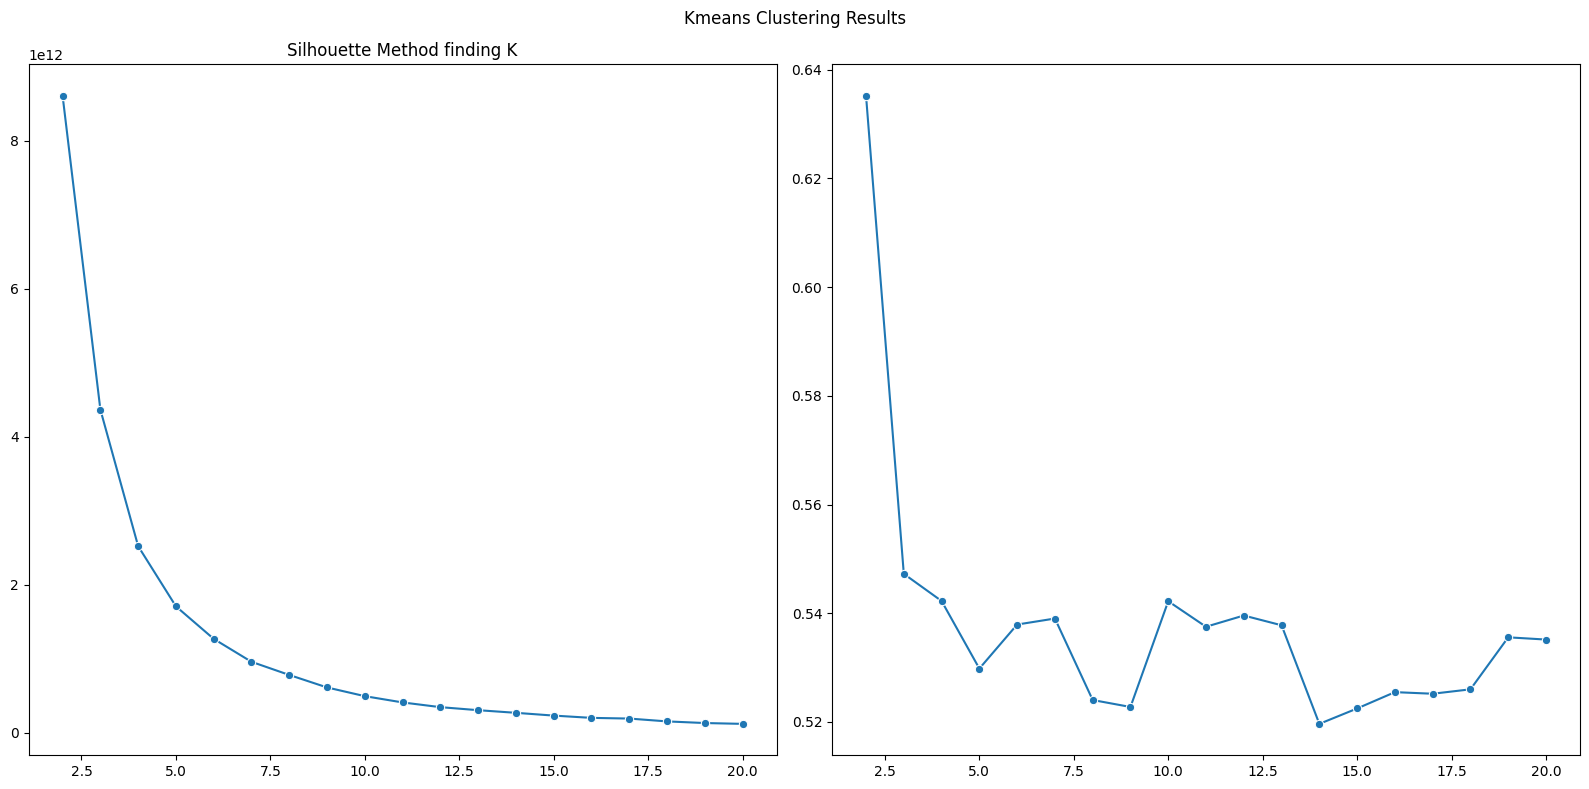

In [28]:
if viewPlots:
    k_range = range(2, 21)
    inertias = []
    silhouettes = []
    fig, axes = plt.subplots(1, 2, figsize=(16,8))

    for k in k_range:
        kmeans_model = KMeans(n_clusters=k, random_state=320)

        kmeans_model.fit(cluster_df[numerical_features])
        inertias.append(kmeans_model.inertia_)

        labels = kmeans_model.fit_predict(cluster_df[numerical_features])
        silhouettes.append(silhouette_score(cluster_df[numerical_features], labels))

    sns.lineplot(x=k_range, y=inertias, ax=axes[0], marker='o')
    axes[0].set_title('Elbow Method finding K')
    sns.lineplot(x=k_range, y=silhouettes, ax=axes[1], marker='o')
    axes[0].set_title('Silhouette Method finding K')

    fig.suptitle('Kmeans Clustering Results')
    plt.tight_layout()
    plt.show()

## Feature Engineering
Key Goals:


## Modeling

## Evaluation